# Data Wrangling 

## Gather

In [70]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
tweet_data = pd.read_json('tweet-json.txt',lines = True)
retweet_like = tweet_data[['id','favorite_count','retweet_count']]
retweet_like.head()


,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [71]:
main_data = pd.read_csv('twitter-archive-enhanced.csv')
main_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [72]:
main_data.query('retweeted_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [73]:
image_prediction = pd.read_csv('image-predictions.tsv',sep='\t')
image_prediction.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Assess

In [74]:
retweet_like

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [75]:
main_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [76]:
main_data[main_data['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [77]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [78]:
retweet_like.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [79]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [80]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Quality

##### `main_data` Table
- 181 retweets that are not necessary for analysis
- modify denominator and numerator datatype (object -> interger)
- some of the rating denominators are greater than 10
- weird dog names ex.a, all
- timestamp is not datetime data type
- in_reply_to_status_id & in_reply_to_user_id are float
- tweet id 892420643555336193 has 0 as its rating denominator


##### `retweet_like` Table
- inconsistent id column name 

#### Tidiness


- `image_prediction`:Only keep one dog breed prediction that has the highest confidence level
- `main_data`:Dog stage should be organised in one column


## Clean

In [81]:
main_data_clean = main_data.copy()
retweet_like_clean = retweet_like.copy()
image_prediction_clean = image_prediction.copy()

### Delete retweets
Delete retweets that are not necessary for analysis and drop retweeted_status_id & retweeted_status_user_id & retweeted_status_timestamp columns

#### Define

Drop rows that have retweeted_status_id and 3 retweet info clolumns

#### Code

In [82]:
retweets = main_data_clean[main_data_clean.retweeted_status_id.notna()]


In [83]:
main_data_clean = pd.concat([main_data_clean,retweets]).drop_duplicates(keep=False)

In [84]:
main_data_clean[main_data_clean['retweeted_status_id'].notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [85]:
main_data_clean = main_data_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)


#### Test

In [86]:
main_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


In [87]:
main_data_clean = main_data_clean.reset_index(drop=True)

### Tidiness
`image_prediction`:Only keep one dog breed prediction that has the highest confidence level

#### Define

Using if statement to build a function to select the most reliable dog breed prediction from three tests.


#### Code

In [88]:
def predict_breed(row):
    if row.p1_dog:
        return row.p1
    elif row.p2_dog:
        return row.p2
    elif row.p3_dog:
        return row.p3
image_prediction_clean['dog_breed'] = image_prediction_clean.apply(lambda row: predict_breed(row),axis=1)


In [89]:
image_prediction_clean = image_prediction_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

#### Test

In [90]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


`main_data`:Dog stage should be organised in one column

#### Define

- Replace all the None in the dog stage columns and concatenate all the strings in four columns.
- Filter out dogs in multiple stages and seperate them with the comma

#### Code

In [91]:
stage_list = main_data_clean[['doggo','floofer','pupper','puppo']]
for stage in stage_list:
    main_data_clean[stage].replace('None','',inplace=True)

In [92]:
main_data_clean['dog_stage'] = main_data_clean.doggo + main_data_clean.floofer + main_data_clean.pupper + main_data_clean.puppo


In [93]:
main_data_clean['dog_stage'] = main_data_clean['dog_stage'].replace('doggopupper','doggo, pupper')
main_data_clean['dog_stage'] = main_data_clean['dog_stage'].replace('doggofloofer','doggo, floofer')
main_data_clean['dog_stage'] = main_data_clean['dog_stage'].replace('doggopuppo','doggo, puppo')

In [94]:
main_data_clean = main_data_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

#### Test

In [95]:
main_data_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
817,748692773788876800,NaN,NaN,2016-07-01 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,https://twitter.com/dog_rates/status/748692773...,10,10,his,doggo
447,806629075125202948,NaN,NaN,2016-12-07 22:38:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Good afternoon class today we're going to lea...",https://twitter.com/dog_rates/status/806629075...,13,10,None,
2118,667065535570550784,NaN,NaN,2015-11-18 19:43:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Hufflepuff. Loves vest. Eyes wi...,https://twitter.com/dog_rates/status/667065535...,8,10,None,
1707,674790488185167872,NaN,NaN,2015-12-10 03:19:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",ER... MER... GERD 13/10 https://t.co/L1puJISV1a,https://twitter.com/dog_rates/status/674790488...,13,10,None,
592,781524693396357120,NaN,NaN,2016-09-29 16:03:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Idk why this keeps happening. We only rate dog...,https://twitter.com/dog_rates/status/781524693...,12,10,None,


### Quality

modify denominator and numerator datatype (object -> interger)

#### Define
using astype to change denominator and numerator datatype to interger

#### Code

In [96]:
main_data_clean['rating_denominator'].astype(int)
main_data_clean['rating_numerator'].astype(int)

0       13
1       13
2       12
3       13
4       12
5       13
6       13
7       13
8       13
9       14
10      13
11      13
12      13
13      12
14      13
15      13
16      12
17      13
18      13
19      12
20      13
21      14
22      13
23      13
24      12
25      13
26      13
27      13
28      12
29      12
        ..
2145     2
2146     7
2147     9
2148    11
2149     6
2150     8
2151    10
2152     9
2153     3
2154     1
2155    11
2156    10
2157     1
2158    11
2159     8
2160     9
2161     6
2162    10
2163     9
2164    10
2165     8
2166     9
2167    10
2168     2
2169    10
2170     5
2171     6
2172     9
2173     7
2174     8
Name: rating_numerator, Length: 2175, dtype: int64

#### Test

In [97]:
main_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                2175 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 187.0+ KB


`main_data`:some of the rating denominators are greater than 10 (pick the first five record to fix)

#### Define
Reduce the fraction or delete the rating record if the number is not relevant
- 832088576586297345: it's a date not rating (delete)
- 820690176645140481: reduce fration (84/70 -> 12/10)
- 758467244762497024: reduce fraction (165/150 -> 11/10)
- 740373189193256964: rating should be 14/10
- 731156023742988288: reduce fration (204/170 -> 12/10)

#### Code

In [98]:
main_data_clean.query('rating_denominator > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
287,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,11,15,None,
363,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,
733,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,
890,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,
942,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,
987,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,
1024,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,
1050,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,
1075,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,
1095,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,


In [99]:
main_data_clean[main_data_clean.tweet_id == 832088576586297345]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
287,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,11,15,None,


In [100]:
main_data_clean.drop(342, inplace=True)

In [101]:
main_data_clean[main_data_clean.tweet_id == 820690176645140481]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
363,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,


In [102]:
main_data_clean.loc[433,['rating_denominator','rating_numerator']] = main_data_clean.loc[433,['rating_denominator','rating_numerator']]/7                     

In [103]:
main_data_clean[main_data_clean.tweet_id == 758467244762497024]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
733,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165.0,150.0,None,


In [104]:
main_data_clean.loc[902,['rating_denominator','rating_numerator']] = main_data_clean.loc[902,['rating_denominator','rating_numerator']]/15


In [105]:
main_data_clean[main_data_clean.tweet_id == 740373189193256964]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
890,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9.0,11.0,None,


In [106]:
main_data_clean.loc[1068,['rating_denominator','rating_numerator']] = [10,14]


In [107]:
main_data_clean[main_data_clean.tweet_id == 731156023742988288]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
942,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204.0,170.0,this,


In [108]:
main_data_clean.loc[1120,['rating_denominator','rating_numerator']] = main_data_clean.loc[1120,['rating_denominator','rating_numerator']]/17


In [109]:
over_10 = main_data_clean.query('rating_denominator > 10')
main_data_clean = pd.concat([main_data_clean,over_10]).drop_duplicates(keep=False)

#### Test

In [110]:
main_data_clean.query('rating_denominator > 10').count()

tweet_id                 0
in_reply_to_status_id    0
in_reply_to_user_id      0
timestamp                0
source                   0
text                     0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                     0
dog_stage                0
dtype: int64

#### Weird dog names

#### Define
Use islower() to filter out weird dog names and drop those rows


In [112]:
wrong_name = main_data_clean[main_data_clean['name'].str.islower()]
wrong_name['name'] = np.nan

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [113]:
(wrong_name['name'].isnull()==False).sum()

0

##### timestamp is not datetime data type

#### Define

timestamp column is string instead of datetime data type 

#### Code

In [114]:
main_data_clean['timestamp'] = pd.to_datetime(main_data_clean['timestamp'])

#### Test

In [115]:
main_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2174
Data columns (total 11 columns):
tweet_id                 2155 non-null int64
in_reply_to_status_id    74 non-null float64
in_reply_to_user_id      74 non-null float64
timestamp                2155 non-null datetime64[ns]
source                   2155 non-null object
text                     2155 non-null object
expanded_urls            2100 non-null object
rating_numerator         2155 non-null float64
rating_denominator       2155 non-null float64
name                     2155 non-null object
dog_stage                2155 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 202.0+ KB


##### not useful values (in_reply_to_status_id & in_reply_to_user_id ) 


#### Define

remove in_reply_to_status_id & in_reply_to_user_id columns

#### Code

In [116]:
main_data_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)


#### Test

In [117]:
list(main_data_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

##### tweet id 892420643555336193 has 0 as its rating denominator

#### Define 

delete post from id 835246439529840640, since it has an invalid rating deniminator (0)

#### Code

In [118]:
main_data_clean.query('rating_denominator =="0"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
263,835246439529840640,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960.0,0.0,None,


In [119]:
main_data_clean.drop(313, inplace=True)

#### Test

In [120]:
main_data_clean.query('rating_denominator =="0"').count()

tweet_id              1
timestamp             1
source                1
text                  1
expanded_urls         0
rating_numerator      1
rating_denominator    1
name                  1
dog_stage             1
dtype: int64

##### inconsistent id column name

#### Define

rename id column in `retweet_like` table to tweet_id to match all the other tables

#### Code

In [121]:
retweet_like_clean.rename(columns={"id": "tweet_id"},inplace=True)

#### Test

In [122]:
list(retweet_like_clean)

['tweet_id', 'favorite_count', 'retweet_count']

## Store Data

In [123]:
main_data_clean.to_csv('twitter_archive_master.csv',index=False)

## Analysis and Visualization

In [124]:
main_analysis = pd.merge(main_data_clean,image_prediction_clean, how='left', on='tweet_id')
main_analysis.drop(['jpg_url','img_num'],axis=1,inplace=True)
main_analysis = pd.merge(main_analysis,retweet_like_clean,how='left',on='tweet_id')
list(main_analysis)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'dog_breed',
 'favorite_count',
 'retweet_count']

### Q1: What breed of dog may get more likes and retweets?

In [125]:
main_analysis['fav_retweet_sum'] = main_analysis['favorite_count'] + main_analysis['retweet_count']
top100_post = main_analysis.sort_values(by='fav_retweet_sum', ascending=False)[:100]
top100_post = main_analysis.sort_values(by='fav_retweet_sum', ascending=False)[:100]
top100_portion = top100_post.groupby('dog_breed')['fav_retweet_sum'].sum().sort_values(ascending=False)
top5_like = top100_portion[:5]
top5_like

dog_breed
golden_retriever      724702
Labrador_retriever    524369
French_bulldog        404779
Samoyed               294894
Chihuahua             263148
Name: fav_retweet_sum, dtype: int64

In [126]:
top100_portion = top100_post.groupby('dog_breed')['tweet_id'].count().sort_values(ascending=False)
top100_portion[:10]

dog_breed
golden_retriever      12
French_bulldog         6
Labrador_retriever     6
Samoyed                5
Pembroke               4
pug                    3
Cardigan               3
Chihuahua              3
cocker_spaniel         3
malamute               2
Name: tweet_id, dtype: int64

Text(0,0.5,'The sum of likes and retweets')

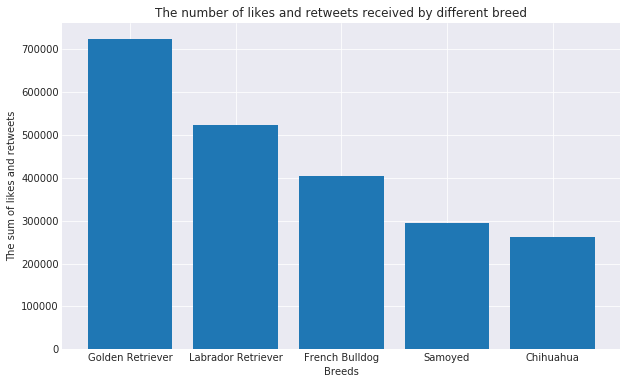

In [127]:
breed = ['Golden Retriever','Labrador Retriever','French Bulldog','Samoyed','Chihuahua']
x = np.arange(5)

plt.figure(figsize=(10,6))
plt.bar(x,top5_like,tick_label=breed)
plt.title('The number of likes and retweets received by different breed')
plt.xlabel('Breeds')
plt.ylabel('The sum of likes and retweets')


#### Golden Retriever, Labrador Retriever, French Bulldog, Samoyed and Chihuahua received the highest number of likes and retweets.
#### Also, in the top 100 most-liked posts, the post number of all the five breeds are in the top 10, which means havings these 5 breeds in the picture may have higher possiblity to capture people's attention.


### Q2: Which breed showed up on the page most frequently?

In [128]:
common_dogs = main_analysis.groupby('dog_breed')['tweet_id'].count().sort_values(ascending=False)[:10]
common_dogs

dog_breed
golden_retriever      155
Labrador_retriever    105
Pembroke               95
Chihuahua              90
pug                    62
toy_poodle             51
chow                   47
Samoyed                42
Pomeranian             42
malamute               33
Name: tweet_id, dtype: int64

Text(0,0.5,'The number of photo')

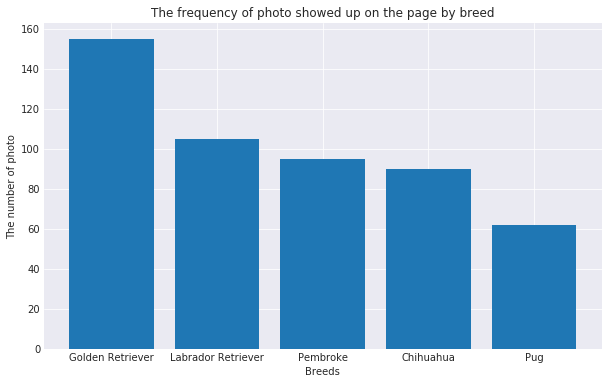

In [129]:
breed = ['Golden Retriever','Labrador Retriever','Pembroke','Chihuahua','Pug']
x = np.arange(5)
plt.figure(figsize=(10,6))
plt.bar(x,common_dogs[:5],tick_label=breed)
plt.title('The frequency of photo showed up on the page by breed')
plt.xlabel('Breeds')
plt.ylabel('The number of photo')

#### The bar chart shows the number of photo by breeds that have been uploaded by users
#### It's similar to the chart in the Q1 except for the Pembroke and Pug, they have higher quatity of photo but less number of likes and retweets than Samoyed and French Bulldog.


### Q3: What kind of dogs tend to get higher ratings?

In [130]:
top10_rating = top100_post.groupby('dog_breed')['rating_numerator'].mean().sort_values(ascending=False)[:10]
top10_rating

dog_breed
Rottweiler                   14.000000
black-and-tan_coonhound      14.000000
standard_poodle              14.000000
Pomeranian                   13.500000
French_bulldog               13.166667
Shetland_sheepdog            13.000000
Staffordshire_bullterrier    13.000000
Lakeland_terrier             13.000000
Eskimo_dog                   13.000000
Old_English_sheepdog         13.000000
Name: rating_numerator, dtype: float64

#### This is the ranking of the breed that acquired the highest average rating by the poster.

#### Interestingly, most of the popular dogs that acquired many likes and retweets can not be seen on this Table.
#### It seems that dogs that are highly rated may not be liked by others as much as their owners do!
